## Scikit Learn
Scikit Learn is a free python machine learning library which features various algorithms like support vector machine (SVM), random forests, k-neighbours. It supports Python numerical libraries like NumPy and SciPy. 

In [3]:
import sklearn

print(sklearn.__version__)

0.23.2


## Loading an example dataset

In [4]:
from sklearn import datasets

# Data to quantify the morphologic variation of Iris flowers
# of three related species
iris = datasets.load_iris()
digits = datasets.load_digits()

In [7]:
print(f"Access to the features that can be used to classify the digits samples:\n{digits.data}")

Access to the features that can be used to classify the digits samples:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
print(f"Ground truth for the digits dataset:\n{digits.target}")

Ground truth for the digits dataset:
[0 1 2 ... 8 9 8]


In [11]:
print(f"Shape of the data arrays:\n{digits.images[0]}")

Shape of the data arrays:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


## Learning and Predicting
In Scikit Learn, an estimator for classification is a Python object that implements the methods ```fit(X, y)``` and ```predict(T)```.

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.96      1.00      0.98        77
           2       1.00      1.00      1.00        87
           3       1.00      0.93      0.97        61
           4       1.00      1.00      1.00        74
           5       0.96      0.99      0.97        73
           6       1.00      1.00      1.00        66
           7       0.99      1.00      0.99        71
           8       0.97      0.96      0.97        76
           9       0.98      0.97      0.98        66

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719


Confusion matrix:
[[68  0  0  0  0  0  0  0  0  0]
 [ 0 77  0  0  0  0  0  0  0  0]
 [ 0  0 87  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  2  0  1  1  0]
 [ 0  0  0  0 74  0  0  0  0

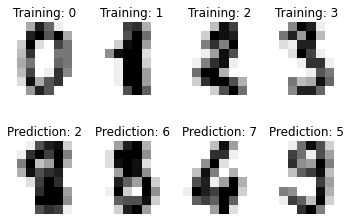

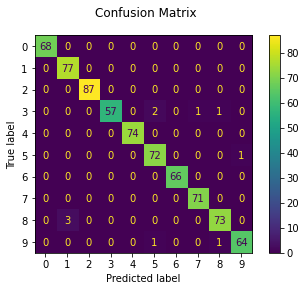

In [22]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

clf = svm.SVC(gamma=0.001, C=100) # classifier

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" %label)
    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, test_size=0.4, shuffle=True)

# Training
clf.fit(X_train, Y_train)

# Prediction
predicted = clf.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_test, predicted)))
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [15]:
from sklearn.model_selection import train_test_split

n_samples = len(digits.images)

# Split data into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(digits.images.reshape((n_samples, -1)), digits.target, test_size=0.4, shuffle=True)

clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

SVC(C=100, gamma=0.001)

array([8])